In [81]:
import sklearn
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression




# PCA

In [2]:


class MyPCA:

    """Calculate the PCA for mean centered data"""
    def __init__(self, x):
        self.x = x
        self.covariance_matrix: np.array = None
        self.variance: np.array = None
        self.principal_components: np.array = None
        self.projections: np.array = None

    def covariance(self):
        self.covariance_matrix = np.cov(self.x)
        # matrix_copy = self.x.copy()
        # variable_means = [np.mean(column) for column in matrix_copy] ## should be near 0 since we mean centered
        
        # for index, mean in enumerate(variable_means):
        #     matrix_copy[index] = matrix_copy[index] - mean
        # cov = []

        # for column in matrix_copy:
        #     column_list = []
        #     for column2 in matrix_copy:
        #         # column_list.append( round( sum(column * column2)/ (len(column) - 1), 8 )  )
        #         column_list.append( sum(column * column2)/ (len(column) - 1)  )

        #     cov.append(column_list)

        # self.covariance_matrix = cov

    def compute_eigens(self):
        """1. Eigenvalue decomposition
           2. Ensures the eigenvalues and eigenvectors are ordered."""
        if not self.covariance_matrix:
            self.covariance()
        vals, vec = np.linalg.eigh(self.covariance_matrix)
        # sorted_vals = []
        # max = vals[0]
        # vals = [6,17,18,18,100,4,3,0]
        index = vals.argsort()[::-1]
        self.variance = vals[index]
        self.principal_components = (vec[:, index]).T
    
    def percent_variance_explained(self):
        if self.variance is None:
            self.compute_eigens()

        return self.variance/sum(self.variance) * 100
    
    def projection(self):
        """Compute Y = X*P aka project the principal components onto X"""
        if self.variance is None:
            self.compute_eigens()

        self.projections = np.dot(self.x.T, self.principal_components.T)
    
    def scree_plot(self):
        if self.variance is None:
            raise Exception("Do eigendecomposition first.")
        variance = self.percent_variance_explained()
        x_axis = np.array(["PC "+str(i+1) for i in range(len(variance))])   
        
        plt.plot(x_axis, variance, linestyle = "-", marker = "o", label = "PC")
        plt.title("scree plot")
        plt.legend()
        plt.show()

    def loading_plot(self, columns):   
        # Extract PC1 and PC2 loadings
        pc1 = self.principal_components[0] * -1  # PC1 loadings (one per variable)
        pc2 = self.principal_components[1]  # PC2 loadings (one per variable)

        plt.figure(figsize=(8, 8))

        # Plot points for loadings
        plt.scatter(pc1, pc2, color='red')

        # Annotate variable names
        for i, feature in enumerate(columns):
            plt.annotate(feature,
                        (pc1[i], pc2[i]),
                        textcoords="offset points",
                        xytext=(5, 5),
                        ha='left',
                        color = "red")

        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title("Loadings Plot")

        # Axes centered for PCA visualization
        plt.axhline(0, color='grey', linewidth=0.5)
        plt.axvline(0, color='grey', linewidth=0.5)

        # Fix axis limits
        # plt.xlim(-1, 1)
        # plt.ylim(-1, 1)

        plt.grid(True)
        plt.show()
        

    def scores_plot(self, metadata):
        if self.projections is None:
            raise ValueError("Compute projections first.")
        
        percent_variance = self.percent_variance_explained()
        projections = self.projections.T
        # plt.scatter(projections[0], projections[1])
        # plt.title("scores plot")
        # plt.xlabel(f'PC 1 ({round(percent_variance[0],1)}%)')
        # plt.ylabel(f'PC 2 ({round(percent_variance[1],1)}%)')
        # plt.show()
        plt.figure(figsize=(8, 6))
        plt.scatter(projections[0][metadata.iloc[:,1] == 0],
                    projections[1][metadata.iloc[:,1] == 0],
                    color='blue', alpha=0.8, label='Class 0')

        # Plot Class 1 points
        plt.scatter(projections[0][metadata.iloc[:,1] == 1],
                    projections[1][metadata.iloc[:,1] == 1],
                    color='red', alpha=0.8, label='Class 1')

        plt.xlabel(f'PC 1 ({round(percent_variance[0],1)}%)')
        plt.ylabel(f'PC 2 ({round(percent_variance[1],1)}%)')
        plt.title('PCA Score Plot')
        plt.legend()
        plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("./data/sample_data_for_project_final.csv").transpose()
metadata = pd.read_csv("./data/sample_metadata_for_project_final.csv")


# Set the first row (original column names) as new column headers
new_columns = data.iloc[0]
data = data[1:]
data.columns = new_columns

df2 = data.copy()

scaler = StandardScaler()
matrix2 = scaler.fit_transform(df2)

# mean_centering(df2)

# matrix2 = df2.to_numpy().astype(float)

data

Unnamed: 0,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,variable_10,...,variable_15597,variable_15598,variable_15599,variable_15600,variable_15601,variable_15602,variable_15603,variable_15604,variable_15605,variable_15606
sample_1,133557.109,291432288.0,103977776.0,18999370.0,10751.889,81506488.0,136.564096,35819420.0,136.564096,85997.516,...,136.564096,5500.958,136.564096,136.564096,136.564096,136.564096,14840.413,3509.693,136.564096,136.564096
sample_2,406777.188,205820016.0,69590672.0,27255152.0,136.564096,73695920.0,136.564096,33806928.0,136.564096,99303.719,...,136.564096,136.564096,136.564096,136.564096,136.564096,136.564096,136.564096,6338.602,2799.276,136.564096
sample_3,465363.813,157209296.0,65461600.0,50499648.0,5717.232,39208156.0,136.564096,48728544.0,136.564096,162395.547,...,136.564096,136.564096,136.564096,136.564096,136.564096,136.564096,8670.437,9574.115,6296.987,136.564096
sample_4,232750.344,188936448.0,78902952.0,38852740.0,136.564096,48073508.0,136.564096,34050052.0,136.564096,87778.508,...,136.564096,14189.32,136.564096,136.564096,136.564096,136.564096,136.564096,1731.127,136.564096,136.564096
sample_5,320498.406,215138112.0,109936376.0,32456494.0,136.564096,57907084.0,136.564096,43285176.0,136.564096,119196.375,...,136.564096,7917.235,136.564096,136.564096,136.564096,136.564096,9700.26,9168.757,4886.416,136.564096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sample_860,313929.063,79534808.0,22436468.0,28543338.0,136.564096,57903016.0,37345704.0,40742204.0,136.564096,93482.063,...,2349.178,5626.164,10775.031,136.564096,2095.552,1826.847,5542.762,136.564096,7640.553,5848.782
sample_861,390410.813,92544472.0,67486648.0,20031750.0,136.564096,55365204.0,50998020.0,58647736.0,136.564096,157648.281,...,136.564096,136.564096,136.564096,2965.998,6135.898,9233.444,136.564096,136.564096,4356.595,11578.846
sample_862,353288.781,137888112.0,55719440.0,19837670.0,136.564096,59020392.0,57315480.0,44283088.0,136.564096,115826.359,...,2515.764,12990.207,4949.809,6428.875,7008.433,6235.643,7214.279,136.564096,136.564096,3406.27
sample_863,597924.688,129187984.0,80070632.0,15826181.0,136.564096,68727808.0,56310956.0,47254052.0,136.564096,70187.469,...,2603.684,7746.302,3995.213,4718.577,8226.846,10743.437,9303.027,136.564096,9194.651,136.564096


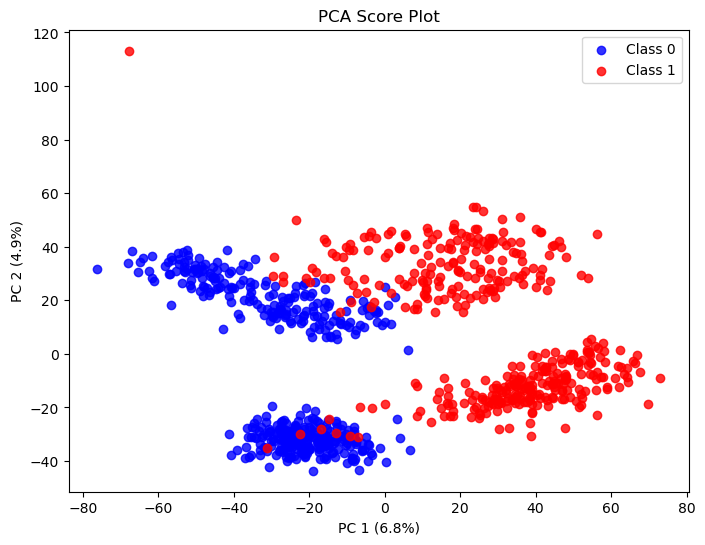

In [4]:

pca_matrix2 = MyPCA(x = matrix2.T)


pca_matrix2.compute_eigens()
pca_matrix2.projection()

pca_matrix2.scores_plot(metadata)


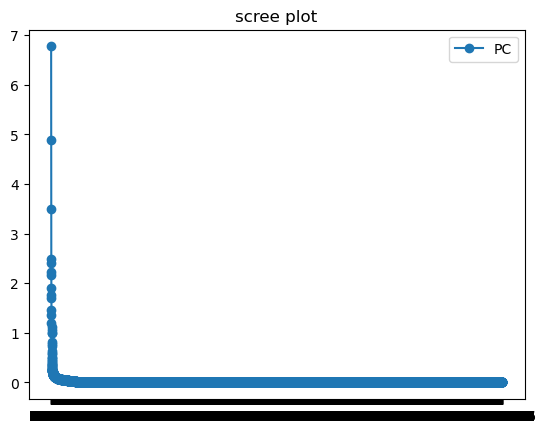

In [5]:
pca_matrix2.scree_plot()


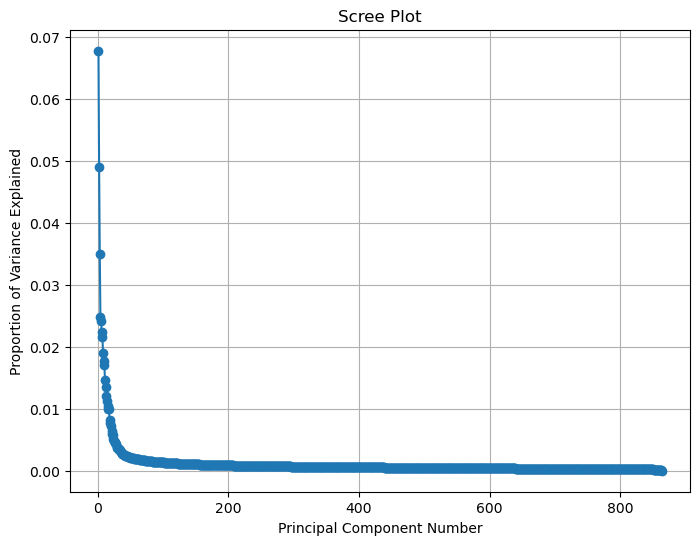

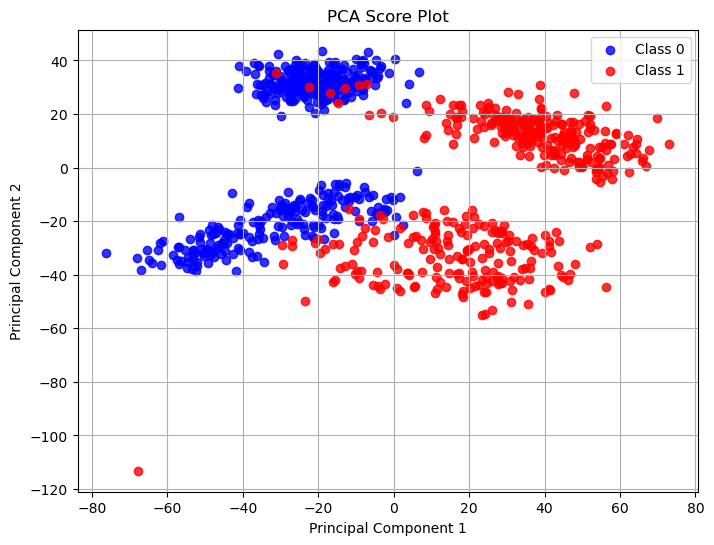

In [6]:


pca = PCA()
pca.fit(matrix2)
X_pca = pca.fit_transform(matrix2)

# Create scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component Number')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.grid(True)
plt.show()



# Create score plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[metadata.iloc[:,1] == 0, 0],
            X_pca[metadata.iloc[:,1] == 0, 1],
            color='blue', alpha=0.8, label='Class 0')

# Plot Class 1 points
plt.scatter(X_pca[metadata.iloc[:,1] == 1, 0],
            X_pca[metadata.iloc[:,1] == 1, 1],
            color='red', alpha=0.8, label='Class 1')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Score Plot')
plt.legend()
plt.grid(True)
plt.show()

# Linear Regression

In [ ]:

corr_matrix = np.corrcoef(matrix2, rowvar=False)**2

# Mask where |corr| > 0.997
mask = np.abs(corr_matrix) > 0.997

# Keep only upper-triangle (to avoid duplicates + avoid diagonal)
mask = np.triu(mask, k=1)

# Get indices of strong correlations
rows, cols = np.where(mask)

# Build a list of (colA, colB, corr)
high_corr_pairs = [
    (data.columns[rows[k]], data.columns[cols[k]], corr_matrix[rows[k], cols[k]])
    for k in range(len(rows))
]

len(f"Amount of variable pairs with a r^2 above 0.997: {high_corr_pairs}.")

14

In [ ]:
r_squared_above_997 = []

scaled_df = pd.DataFrame(matrix2)
scaled_df.columns = data.columns

for row in high_corr_pairs: 


    X = scaled_df[row[0]] 
    Y = scaled_df[row[1]]

    Sxy = sum( (X-X.mean()) * (Y-Y.mean()) )
    Sxx = sum( (X-X.mean())**2 )

    b1 = Sxy/Sxx

    b0 = Y.mean() - b1*(X.mean())

    SSyy = sum((Y-Y.mean())**2)
    SSred = sum( (Y - (b1*X + b0))**2 )

    r_squared = 1 - (SSred/SSyy)

    if r_squared >= 0.997:
        r_squared_above_997.append({"x": row[0],"y": row[1],"r_squared": r_squared, "slope": b1, "intercept": b0})


print(f"Amount of variable pairs with a r^2 above 0.997: {len(r_squared_above_997)}.")

14

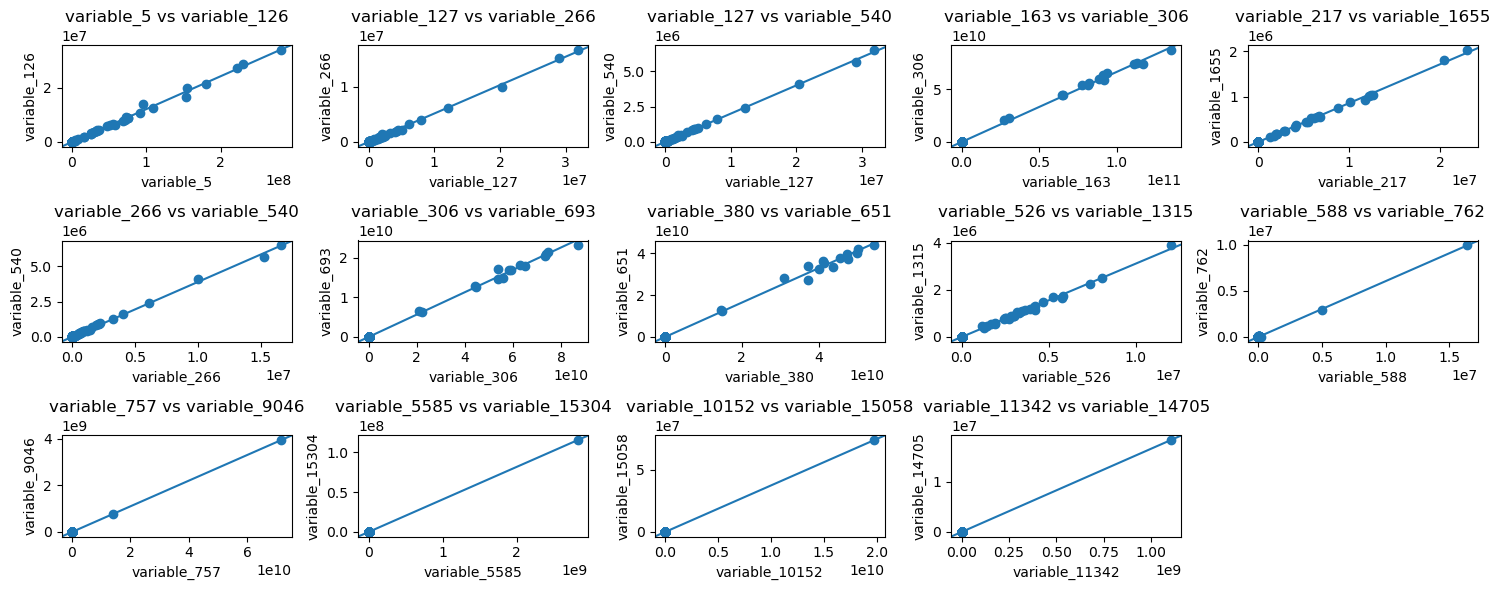

In [119]:


fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(15,6))
axs = axs.flatten()

for i in range(len(r_squared_above_997)):
    row = r_squared_above_997[i]
    x = r_squared_above_997[i]["x"]
    y = r_squared_above_997[i]["y"]
    slope = r_squared_above_997[i]["slope"] * np.std(data[y])/np.std(data[x]) ## unscale the slope
    intercept =  np.mean(data[y]) + (r_squared_above_997[i]["intercept"] * np.std(data[y])) - (slope * np.mean(data[x])) ## unscale the intercept

    axs[i].scatter(data[x], data[y])
    axs[i].set_title(f"{x} vs {y}")
    axs[i].set_xlabel(f"{x}")
    axs[i].set_ylabel(f"{y}")

    axs[i].axline((0, intercept), slope=slope, color='C0', label='by slope')


plt.tight_layout()
plt.delaxes(axs[-1])
plt.show()


In [118]:
## sklearn

sklearn_above_997 = []

scaled_df = pd.DataFrame(matrix2)
scaled_df.columns = data.columns

for row in high_corr_pairs: 
    X = scaled_df[row[0]].to_numpy().reshape(-1, 1) 
    Y = scaled_df[row[1]].to_numpy().reshape(-1, 1)

    linearmodel = LinearRegression()
    linearmodel.fit(X, Y)

    r_squared = r2_score(Y, linearmodel.predict(Y))
    if r_squared >= 0.997:
        sklearn_above_997.append({"x": row[0],"y": row[1],"r_squared": r_squared})
    
    
print(f"Amount of variable pairs with a r^2 above 0.997: {len(sklearn_above_997)}.")




Amount of variable pairs with a r^2 above 0.997: 14.


# Logistic Regression


In [121]:
X_train, X_test, y_train, y_test = train_test_split(data, metadata["sample_label"].values, test_size=0.2, random_state=42)
scaler = StandardScaler()

Y = y_train
X = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
## add intercept
X_with_intercept = np.insert( X, 0, np.array([1]*X.shape[0]), axis = 1 )

In [ ]:
LEARNING_RATE = 0.01
EPOCHS = 1000
cost = 0
b_vector = np.zeros(X_with_intercept.shape[1]) ## initilize intercept and coefficents as 0
cols = ["intercept"] + list(scaled_df.columns)


def compute_sigmoid(B: np.ndarray, X: np.ndarray):

    # return 1 / (1 + np.exp(-np.dot(X, B))) ## ALT METHOD: np.dot(X, B) computes the dot product between each row of X and B
    return 1/(  1 + np.exp( - X @ B )  ) ## X @ B computes the dot product between each row of X and B


def compute_cost(B: np.ndarray, X: np.ndarray, Y: np.ndarray):
    num_rows = Y.shape[0]
    sigmoid = compute_sigmoid(B, X)

    return np.sum((Y * np.log(sigmoid)) + (1 - Y) * np.log(1-sigmoid)) / -num_rows

def partial_derivative(B: np.ndarray, X: np.ndarray, Y: np.ndarray):
    num_rows = Y.shape[0]
    sigmoid = compute_sigmoid(B, X)

    # return (1 / num_rows) * np.dot(X.T, (sigmoid - Y)) ## ALT METHOD
    
    ## (sigmoid - Y)[:,np.newaxis] changes its shape from (n,) to (n, 1)
    return np.sum( (sigmoid - Y)[:,np.newaxis] * X, axis = 0 ) / num_rows



# for epoch in range(EPOCHS):
for epoch in range(EPOCHS): 
    
    cost_old = cost
    cost = compute_cost(b_vector, X_with_intercept, Y)
    
    if abs(cost_old - cost) >= 0.00000001:
        b_vector -= LEARNING_RATE * partial_derivative(b_vector, X_with_intercept, Y)

        b_dict = {col : b for col, b in zip(cols, b_vector)}

        if epoch % 100 == 0 or epoch+1 == 1000:
            print(f"------------------------------------epoch: {epoch}------------------------------------")
            print(f"\t\t\t\tcost: {cost}\nb_dict: {b_dict}")

    else: break

print(f"---------------------------------------\nReached a cost of {cost_old} after {epoch+1} epochs.")
print("final values: ")
for key, value in b_dict.items(): print(f"{key}: {round(value,8)}")


------------------------------------epoch: 0------------------------------------
				cost: 0.6931471805599454
b_dict: {'intercept': -0.00028219971056439943, 'variable_1': -0.00043570330483167895, 'variable_2': -0.001967514972122111, 'variable_3': -0.0016571881402825655, 'variable_4': -0.00023919747070659005, 'variable_5': -0.00011723853775319194, 'variable_6': -0.0007843695092047108, 'variable_7': -0.0006873282171326253, 'variable_8': -0.002360159970135377, 'variable_9': -0.00019600605024236065, 'variable_10': -0.000290229103974176, 'variable_11': -0.0005228650020884565, 'variable_12': -0.0009999854335324319, 'variable_13': -0.000252522132314218, 'variable_14': -0.0019741400419796646, 'variable_15': -0.0021578521270538722, 'variable_16': -0.0007918814764317346, 'variable_17': 0.0022468027865761102, 'variable_18': -0.0020474204052068736, 'variable_19': -0.00014566734118544327, 'variable_20': -0.000900741119371198, 'variable_21': 0.0018876993003974665, 'variable_22': 0.002808399846234325

In [ ]:
## add intercept to X_test
X_test_with_intercept = np.insert( X_test.to_numpy(dtype=np.float64), 0, np.array([1]*X_test.shape[0]), axis = 1 )

y_predicted = compute_sigmoid( b_vector, X_test_with_intercept )
y_predicted = np.where(y_predicted > 0.5, 1, 0) 

# print("\npredicted y values:\n", y_predicted )

# diff = y_predicted - y_test
# print(f"misclassification rate: {len(diff[diff > 0]) / len(y_test) * 100}%")

score = accuracy_score(y_test, y_predicted)
print(f"accuracy: {round(score*100)}%")

accuracy: 100%


In [ ]:
logreg = LogisticRegression(random_state=16,  max_iter=1000, penalty=None)

# model = logreg.fit(X_df, Y_df)
SklearnModel = logreg.fit(X_train, y_train)
y_predicted = SklearnModel.predict(X_test)
score = accuracy_score(y_test, y_predicted)
print(f"accuracy: {round(score*100)}%")

# coef_df = {col : coef for col, coef in zip(list(cols[1:len(cols)]), SklearnModel.coef_[0])}
# print(coef_df)
# print(X.columns)
# print(f"coefficent: {coef_df}\nintercept: {SklearnModel.intercept_}")


accuracy: 99%


# ANN

Iteration 0, cost: 0.6932, Train Accuracy: 0.5282
Iteration 1000, cost: 0.0214, Train Accuracy: 1.0000
Iteration 2000, cost: 0.0104, Train Accuracy: 1.0000
Iteration 3000, cost: 0.0069, Train Accuracy: 1.0000
Iteration 4000, cost: 0.0051, Train Accuracy: 1.0000


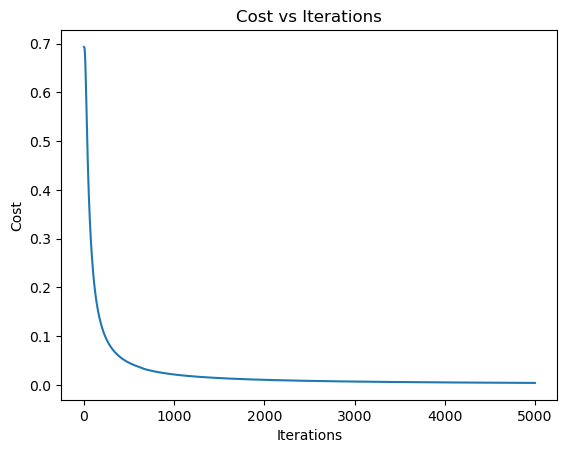

Custom NN Train Accuracy: 1.0
Custom NN Test Accuracy: 1.0


In [ ]:
# Helper functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(a):
    return a * (1 - a)

def compute_cost(y_true, y_pred):
    m = y_true.shape[0]
    cost = -1/m * np.sum(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))
    return cost


# Neural Network Class
class SimpleANN:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1):
        self.W1 = np.random.randn(hidden_size, input_size) * 0.01
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size) * 0.01
        self.b2 = np.zeros((output_size, 1))
        self.lr = learning_rate
        self.costs = []

    def forward(self, X):
        """
        X: shape (m, input_size)
        """
        self.A0 = X.T  # shape: (input_size, m)
        self.Z1 = np.dot(self.W1, self.A0) + self.b1  # (hidden_size, m)
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.W2, self.A1) + self.b2  # (output_size, m)
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, Y):
        m = X.shape[0]
        Y = Y.reshape(1, -1)  # shape: (1, m)

        # Forward pass
        A2 = self.forward(X)

        # Compute cost
        cost = compute_cost(Y.T, A2.T)

        # Backpropagation (vectorized)
        dZ2 = A2 - Y  # (1, m)
        dW2 = (1/m) * np.dot(dZ2, self.A1.T)  # (1, hidden_size)
        db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)  # (1,1)

        dA1 = np.dot(self.W2.T, dZ2)  # (hidden_size, m)
        dZ1 = dA1 * sigmoid_derivative(self.A1)  # (hidden_size, m)
        dW1 = (1/m) * np.dot(dZ1, self.A0.T)  # (hidden_size, input_size)
        db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)  # (hidden_size,1)

        # Update weights
        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

        return cost

    def train(self, X, y, iterations=1000):
        for it in range(iterations):
            cost = self.backward(X, y)
            self.costs.append(cost)
            y_pred_train = self.predict(X)
            acc = accuracy_score(y, y_pred_train)
            if it % 1000 == 0:
                print(f"Iteration {it}, cost: {cost:.4f}, Train Accuracy: {acc:.4f}")

    def predict(self, X):
        A2 = self.forward(X)
        return (A2 > 0.5).astype(int).T

# Train custom neural network
nn = SimpleANN(input_size=X_train.shape[1], hidden_size=2, output_size=1, learning_rate=0.1)
nn.train(X_train.to_numpy(dtype=np.float64), y_train, iterations=5000)

# Plot cost vs iterations
plt.plot(nn.costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.show()

# Evaluate custom NN
y_pred_train = nn.predict(X_train.to_numpy(dtype=np.float64))
y_pred_test = nn.predict(X_test.to_numpy(dtype=np.float64))
print("Custom NN Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Custom NN Test Accuracy:", accuracy_score(y_test, y_pred_test))




Sklearn MLP Train Accuracy: 1.0
Sklearn MLP Test Accuracy: 0.9884393063583815


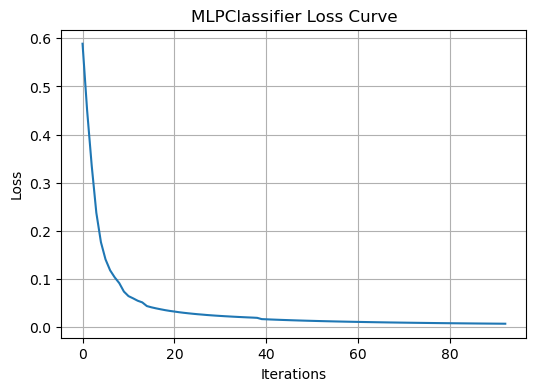

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(2,), 
                    activation='logistic', 
                    max_iter=5000, 
                    random_state=42, 
                    solver = "sgd", 
                    learning_rate_init=0.2)

mlp.fit(X_train.to_numpy(dtype=np.float64), y_train.ravel())
y_pred_train_skl = mlp.predict(X_train.to_numpy(dtype=np.float64))
y_pred_test_skl = mlp.predict(X_test.to_numpy(dtype=np.float64))
print("Sklearn MLP Train Accuracy:", accuracy_score(y_train, y_pred_train_skl))
print("Sklearn MLP Test Accuracy:", accuracy_score(y_test, y_pred_test_skl))

# Plot the loss curve
plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_)
plt.title("MLPClassifier Loss Curve")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.grid(True)
plt.show()